In [ ]:
import os

folder_path = '/Users/ayahmiqdad/Desktop/Thesis literutre 2024/icpe-data-challenge-jmh/timeseries'

# List all files in the folder
files = os.listdir(folder_path)

# Print the list of files
print(files)

In [ ]:
import os
import json


folder_path = '/Users/ayahmiqdad/Desktop/Thesis literutre 2024/icpe-data-challenge-jmh/timeseries'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate over each file
for file in files:
    if file.endswith('.json'):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            print(f"Data from file {file}:")
            print(data)
            print()

In [6]:
import pandas as pd
import os
import json
import numpy as np

def calculate_average_and_std(measurements):
    if isinstance(measurements[0], list):
        # If measurements are nested lists, flatten them
        measurements = [item for sublist in measurements for item in sublist]
    # Calculate the average duration
    average_duration = sum(measurements) / len(measurements)
    # Calculate the standard deviation
    std_deviation = np.std(measurements)
    return average_duration, std_deviation
    
def extract_metadata_from_filename(filename):
    # Split filename by '#' to separate project and benchmark parts
    parts = filename.split('#')
    # Extract project name from the first part
    project = parts[0].split('__')[0]
    # Extract benchmark name from the second part
    # Remove '.json' extension and split by '.' to get the benchmark name
    benchmark_parts = parts[1].replace('.json', '').split('.')
    if len(benchmark_parts) > 5:
        benchmark = benchmark_parts[5]
    else:
        benchmark = benchmark_parts[-1]
    return project, benchmark

def process_json_file(filepath):
    with open(filepath, 'r') as json_file:
        data = json.load(json_file)
        # Check if data is a list or a nested list
        if isinstance(data, list):
            average_duration, std_deviation = calculate_average_and_std(data)
        else:
            # If data is not a list, assume it's a single measurement
            average_duration, std_deviation = data, np.nan
        return average_duration, std_deviation

def main():
    time_series_folder = '/Users/ayahmiqdad/Desktop/Thesis literutre 2024/icpe-data-challenge-jmh/timeseries'
    rows = []
    for filename in os.listdir(time_series_folder):
        if filename.endswith(".json"):
            filepath = os.path.join(time_series_folder, filename)
            average_duration, std_deviation = process_json_file(filepath)
            project, benchmark = extract_metadata_from_filename(filename)
            rows.append([project, benchmark, average_duration, std_deviation])

    # Create a DataFrame to store the data
    df = pd.DataFrame(rows, columns=["Project", "Benchmark", "Average Duration", "Standard Deviation"])

    # Save the DataFrame to a CSV file
    df.to_csv("average_durations_with_metadata.csv", index=False)

    print("Average durations with metadata and standard deviation saved to average_durations_with_metadata.csv")

if __name__ == "__main__":
    main()


Average durations with metadata and standard deviation saved to average_durations_with_metadata.csv


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from os.path import basename

class Benchmark:
    """Measurements from a single benchmark"""

    def __init__(self, filename):
        self.filename = filename
        self.measurements = []

        # Parse filename to extract information
        self.project, self.benchmark = os.path.splitext(basename(filename))[0].split('__')

    def get_measurements(self):
        """Get measurements from the JSON file"""
        with open(self.filename) as f:
            data = json.load(f)
            if isinstance(data, list):
                self.measurements = data
            else:
                print("Invalid JSON format in file:", self.filename)

        return self.measurements

def get_benchmarks(data_dir):
    """Get all the JSON files and create Benchmark objects"""
    return [Benchmark(f) for f in glob('{}/*.json'.format(data_dir))]

def plot(benchmark):
    """Plot measurements for a benchmark"""
    measurements = benchmark.get_measurements()
    plt.figure(figsize=(10,6))
    plt.plot(range(len(measurements)), measurements, marker='o')
    plt.title(f"Measurement Plot for {benchmark.project}: {benchmark.benchmark}")
    plt.xlabel("Iteration")
    plt.ylabel("Measurement")
    plt.grid(True)
    plt.savefig(f"{benchmark.project}_{benchmark.benchmark}_plot.png")
    plt.show()

if __name__ == "__main__":
    DATA_DIR = '/Users/ayahmiqdad/Desktop/Thesis literutre 2024/icpe-data-challenge-jmh/timeseries'  # Directory containing JSON files

    # Get benchmarks
    benchmarks = get_benchmarks(DATA_DIR)

    # Plot measurements for each benchmark
    for benchmark in benchmarks:
        plot(benchmark)


Mean Duration: 0.2725669257392745
Median Duration: 2.2686748835264216e-05
Standard Deviation: 1.3648177871800697


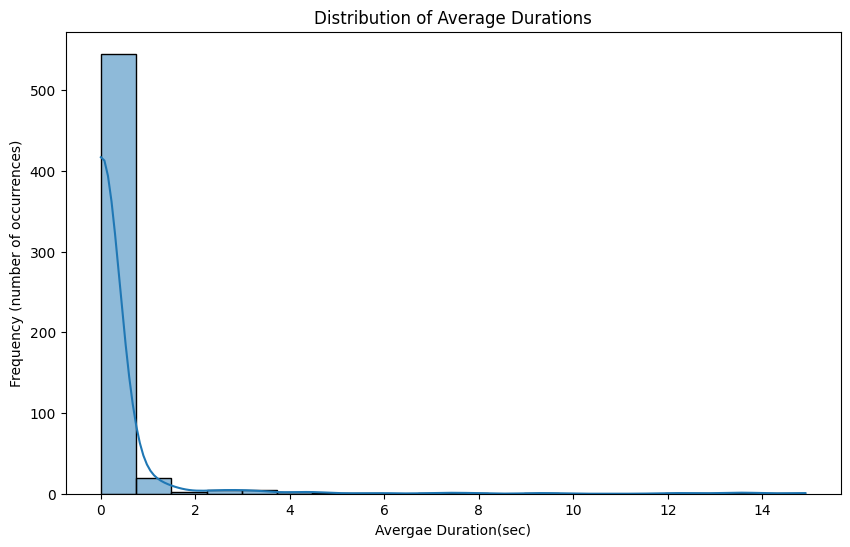

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset into a DataFrame
# Data contains the dataset with columns 'Project' and 'Average Duration'
df = pd.read_csv('average_durations_with_metadata.csv')

# Step 2: Descriptive Statistics
mean_duration = df['Average Duration'].mean()
median_duration = df['Average Duration'].median()
std_deviation = df['Average Duration'].std()

print(f"Mean Duration: {mean_duration}")
print(f"Median Duration: {median_duration}")
print(f"Standard Deviation: {std_deviation}")

# Step 3: Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Average Duration', bins=20, kde=True)
plt.title('Distribution of Average Durations')
plt.xlabel('Avergae Duration(sec)')
plt.ylabel('Frequency (number of occurrences)')
plt.show()




Mean Duration: 0.2725669257392745
Median Duration: 2.2686748835264216e-05
Standard Deviation: 1.3648177871800697


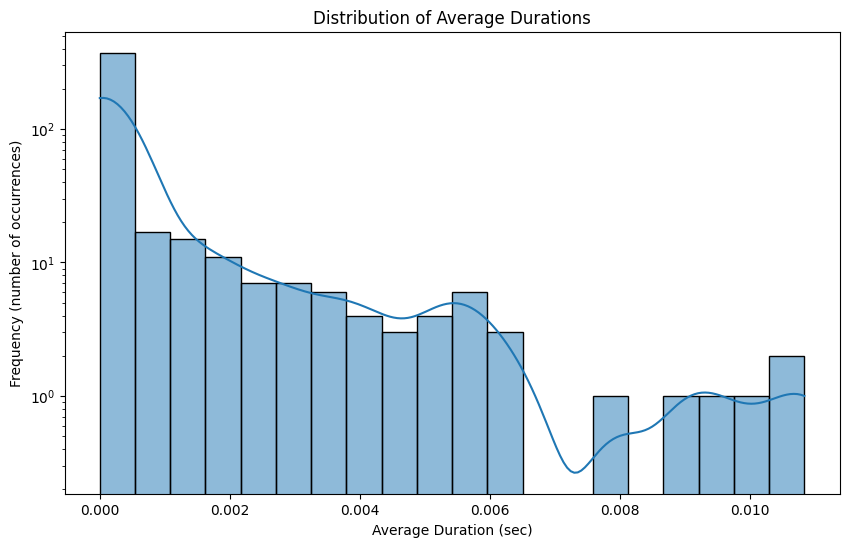

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset into a DataFrame

df = pd.read_csv('average_durations_with_metadata.csv')

# Step 2: Descriptive Statistics
mean_duration = df['Average Duration'].mean()
median_duration = df['Average Duration'].median()
std_deviation = df['Average Duration'].std()

print(f"Mean Duration: {mean_duration}")
print(f"Median Duration: {median_duration}")
print(f"Standard Deviation: {std_deviation}")

# Step 3: Remove outliers

q1 = df['Average Duration'].quantile(0.25)
q3 = df['Average Duration'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_filtered = df[(df['Average Duration'] >= lower_bound) & (df['Average Duration'] <= upper_bound)]

# Step 4: Visualization after eliminating outliers

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='Average Duration', bins=20, kde=True)
plt.title('Distribution of Average Durations')
plt.xlabel('Average Duration (sec)')
plt.ylabel('Frequency (number of occurrences)')

plt.yscale('log')  # Using logarithmic scale on the y-axis
plt.show()



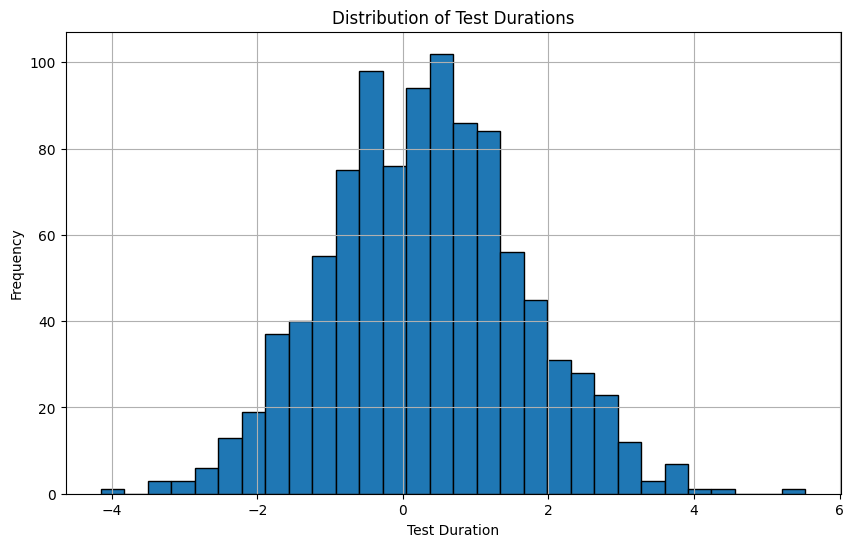

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data based on mean and standard deviation
np.random.seed(42)  # for reproducibility
data = np.random.normal(loc=0.2726, scale=1.3648, size=1000)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, edgecolor='black')
plt.title('Distribution of Test Durations')
plt.xlabel('Test Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

# Assuming 'average_durations_with_metadata.csv' contains the dataset with columns 'Project', 'Benchmark', 'Average Duration', and 'Standard Deviation'
df = pd.read_csv('average_durations_with_metadata.csv')

# Group the DataFrame by 'Project' and calculate the mean of 'Average Duration' for each project
mean_duration_per_project = df.groupby('Project')['Average Duration'].mean()

print("Mean of average duration for each project:")
print(mean_duration_per_project)

Mean of average duration for each project:
Project
HdrHistogram          1.010548e-04
JCTools               6.848890e-06
ReactiveX             5.259418e-01
RoaringBitmap         4.967879e-02
apache                1.003902e-02
cantaloupe-project    9.519660e-03
crate                 1.758400e-01
eclipse               8.390793e-01
eclipse-vertx         3.712499e-04
h2oai                 8.236194e-01
hazelcast             4.380267e-05
imglib                6.395602e-02
jdbi                  1.692034e-02
jgrapht               1.873328e+00
netty                 3.844614e-07
openzipkin            1.084886e-03
prestodb              1.905795e+00
prometheus            1.058325e-06
protostuff            1.654941e-05
r2dbc                 3.298648e-05
raphw                 1.666546e-03
yellowstonegames      7.546552e-03
zalando               8.566661e-06
Name: Average Duration, dtype: float64


/var/folders/qw/w2vxl_v11nz9r112_14rppq00000gn/T/ipykernel_25047/3161370486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_duration_per_project, x='Project', y='Average Duration', palette='viridis')


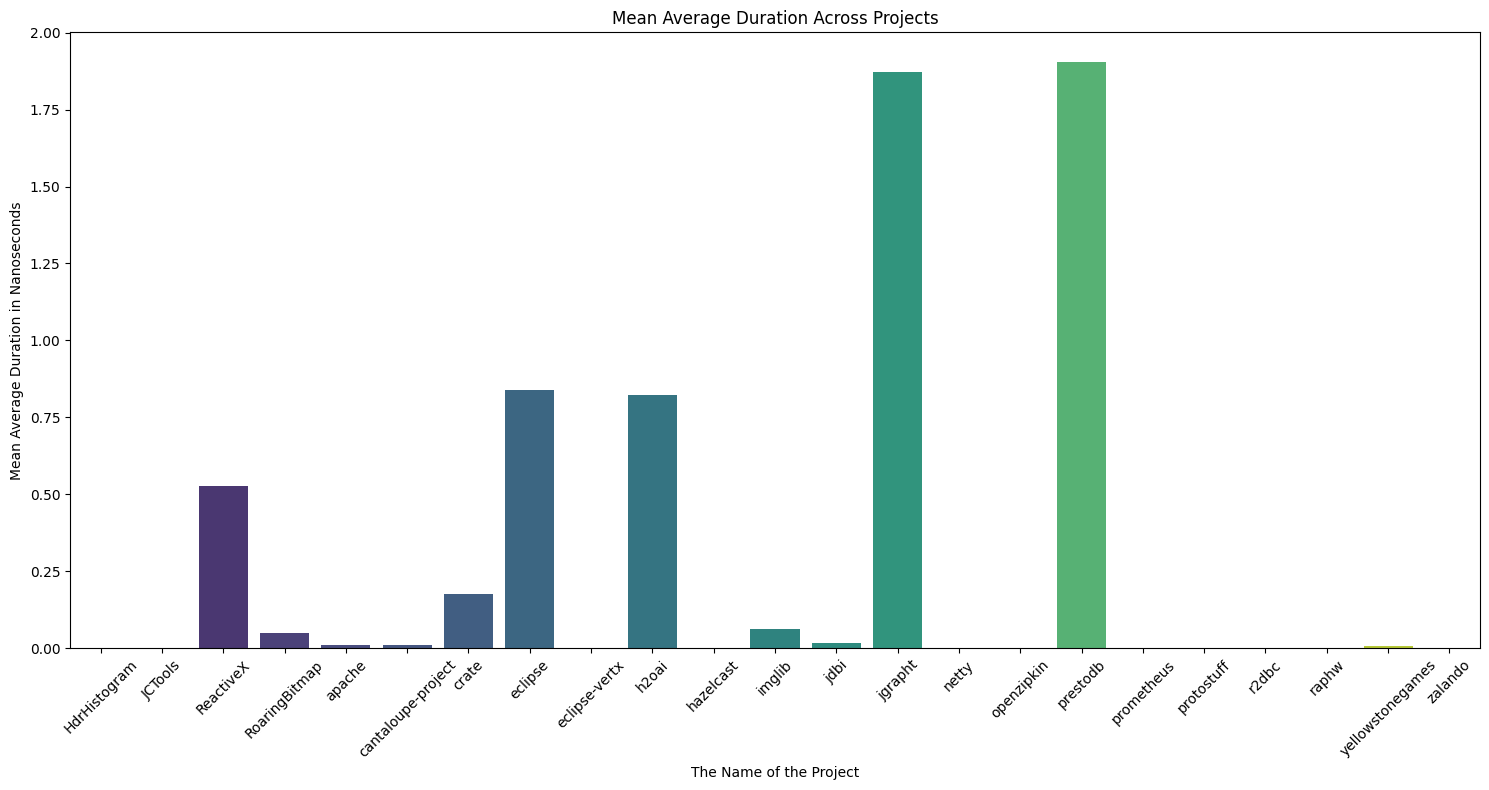

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# the file that contains the dataset with columns 'Project', 'Benchmark', 'Average Duration', and 'Standard Deviation'
df = pd.read_csv('average_durations_with_metadata.csv')

# Group the DataFrame by 'Project' and calculate the mean of 'Average Duration' for each project
mean_duration_per_project = df.groupby('Project')['Average Duration'].mean().reset_index()

# Create the plot
plt.figure(figsize=(15, 8)) # Adjust the width of the plot as needed
sns.barplot(data=mean_duration_per_project, x='Project', y='Average Duration', palette='viridis')
plt.title('Mean Average Duration Across Projects')
plt.xlabel('The Name of the Project')
plt.ylabel('Mean Average Duration in Nanoseconds')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


/var/folders/qw/w2vxl_v11nz9r112_14rppq00000gn/T/ipykernel_25047/3676782058.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=lowest_duration_projects, x='Project', y='Average Duration', palette='Blues_r')
/var/folders/qw/w2vxl_v11nz9r112_14rppq00000gn/T/ipykernel_25047/3676782058.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=highest_duration_projects, x='Project', y='Average Duration', palette='Reds_r')


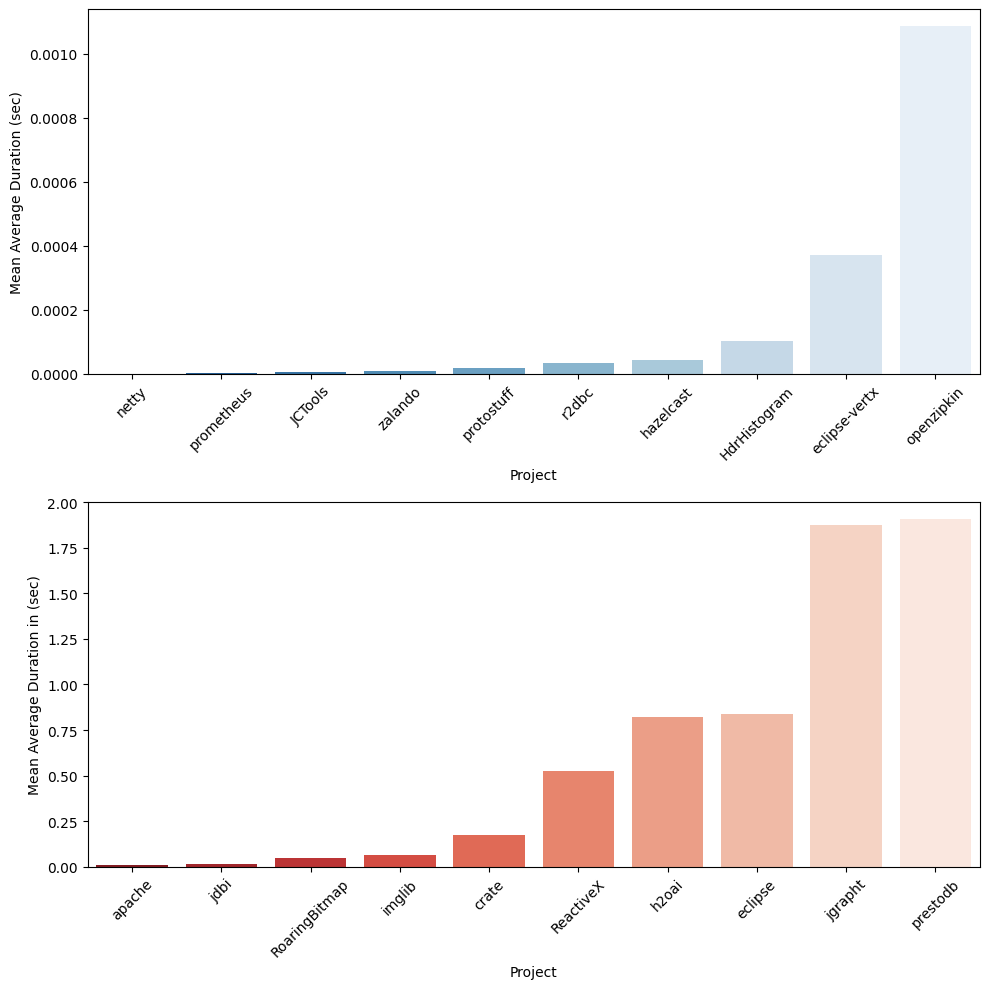

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset from the CSV file
df = pd.read_csv('average_durations_with_metadata.csv')

# Group the DataFrame by 'Project' and calculate the mean of 'Average Duration' for each project
mean_duration_per_project = df.groupby('Project')['Average Duration'].mean().reset_index()

# Sort the DataFrame by 'Average Duration' in ascending order
mean_duration_per_project_sorted = mean_duration_per_project.sort_values(by='Average Duration')

# Split the DataFrame into two parts: lowest and highest average duration
lowest_duration_projects = mean_duration_per_project_sorted.head(10)
highest_duration_projects = mean_duration_per_project_sorted.tail(10)

# Create a subplot with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Plot for projects with the lowest average duration
sns.barplot(ax=axes[0], data=lowest_duration_projects, x='Project', y='Average Duration', palette='Blues_r')
axes[0].set_xlabel('Project')
axes[0].set_ylabel('Mean Average Duration (sec)')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for projects with the highest average duration
sns.barplot(ax=axes[1], data=highest_duration_projects, x='Project', y='Average Duration', palette='Reds_r')
axes[1].set_xlabel('Project')
axes[1].set_ylabel('Mean Average Duration in (sec)')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()
